In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pyart
import cartopy.crs as ccrs
from pyart.testing import get_test_data
import os

In [27]:
dataDir = "Data/01/"
filenames = [dataDir + filename for filename in os.listdir(dataDir)]

In [30]:
# Read in a sample file
radar = pyart.io.read(filenames[1])
radar = pyart.io.read("20231017/KFWS20231017_052702_V06")
# filename = get_test_data("110635.mdv")
# radar = pyart.io.read(filename)


In [31]:
# radar = pyart.io.read(filenames[0])
# len(radar.elevation["data"].tolist())

radar.fields


{'velocity': {'units': 'meters_per_second',
  'standard_name': 'radial_velocity_of_scatterers_away_from_instrument',
  'long_name': 'Mean dopper velocity',
  'coordinates': 'elevation azimuth range',
  '_FillValue': -9999.0,
  'data': masked_array(
    data=[[  9.149994  ,   0.01998901,  -0.8300171 , ...,   2.769989  ,
             2.769989  ,   2.869995  ],
          [ 15.73999   ,   0.16998291,  -0.55999756, ...,  -3.600006  ,
            -3.6100159 ,  -3.649994  ],
          [ -0.23001099,   0.        ,  -0.42001343, ...,  12.160004  ,
            12.160004  ,  12.160004  ],
          ...,
          [-15.550018  ,  -0.22000122, -11.240021  , ...,  -6.8399963 ,
            -6.950012  ,  -6.9200134 ],
          [-11.839996  ,  -0.08999634, -11.580017  , ...,  -9.76001   ,
            -9.790009  , -10.059998  ],
          [-14.820007  ,  -0.05001831, -11.880005  , ...,  -7.01001   ,
            -7.0200195 ,  -7.        ]],
    mask=False,
    fill_value=-9999.0,
    dtype=float32)},
 '

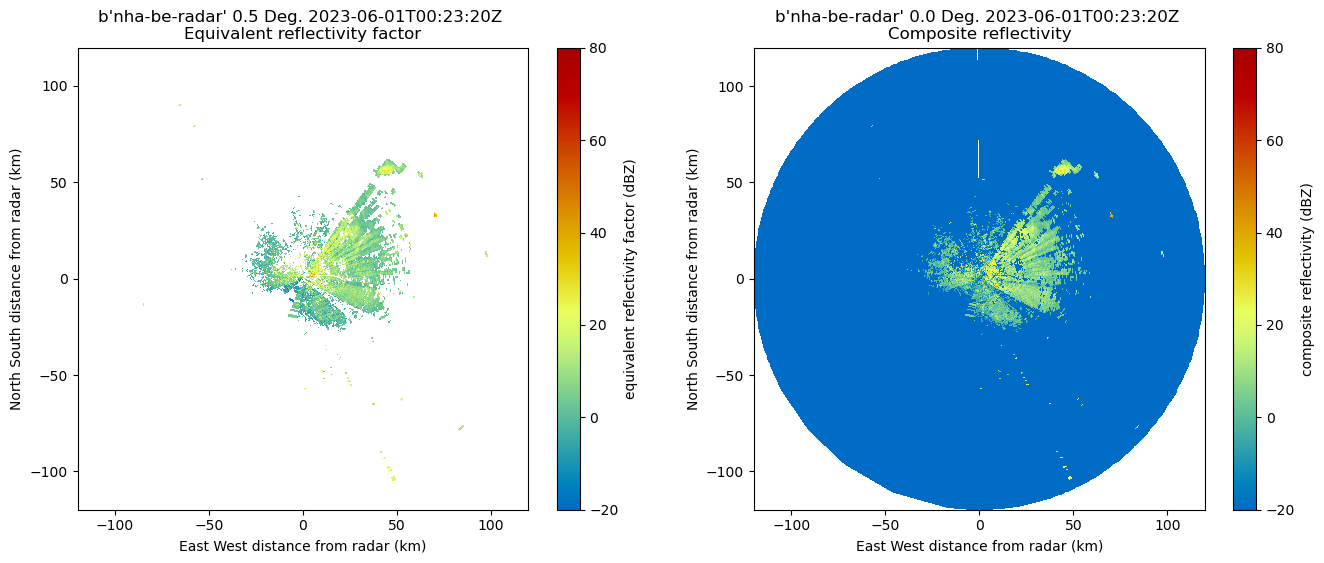

In [19]:

# Configure a gatefilter to filter out copolar correlation coefficient values > 0.9
gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_transition()
# gatefilter.exclude_below("copol_coeff", 0.9)

# Calculate composite reflectivity, or the maximum reflectivity across all elevation levels
compz = pyart.retrieve.composite_reflectivity(
    radar, field="reflectivity", gatefilter=gatefilter
)

# Plot the original reflectivity field and the composite field
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot(121)
display = pyart.graph.RadarDisplay(radar)
display.plot("reflectivity", ax=ax, vmin=-20, vmax=80)

ax2 = plt.subplot(122)
composite_display = pyart.graph.RadarDisplay(compz)
composite_display.plot(
    "composite_reflectivity", ax=ax2, vmin=-20, vmax=80, cmap="pyart_HomeyerRainbow"
)


In [37]:
mdvDir = "20230601/"
mdvNames = [mdvDir + filename for filename in os.listdir(mdvDir)]


In [38]:
grid = pyart.io.read_grid_mdv(mdvNames[0])
# grid = pyart.io.read_mdv(filename)

In [39]:
grid.fields["reflectivity"]

{'units': 'dBZ',
 'standard_name': 'equivalent_reflectivity_factor',
 'long_name': 'Reflectivity',
 'coordinates': 'elevation azimuth range',
 '_FillValue': -9999.0,
 'data': masked_array(
   data=[[[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --]],
 
         [[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --]],
 
         [[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --]],
 
         ...,
 
   

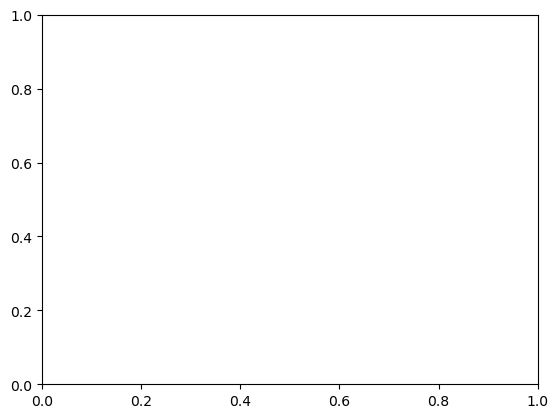

In [30]:
display = pyart.graph.GridMapDisplayBasemap(grid)
display.get_basemap()